# Sobre o notebook

A "hora da prática" é uma atividade do curso de Data Visualization: gráficos de comparação e distribuição da Alura para a escrita e teste dos códigos dos diversos desafios envolvendo os aprendizados de cada aula.

O notebook "hora da prática" é um notebook construído com espaço para as células dos desafios propostos no curso, com ele você tem espaço para construir e executar suas soluções


## Paleta de Cores

Vamos compartilhar aqui a paleta de cores que usamos durante o curso pra você executar e usar em seu projeto, mas sinta-se livre para construir a sua propria.

In [1]:
# Definindo a paleta de cores
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5 = '#03045e', '#0077b6', "#00b4d8", '#90e0ef', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5 = '#212529', '#495057', '#adb5bd', '#dee2e6', '#f8f9fa'
VERMELHO1, LARANJA1, AMARELO1, VERDE1, VERDE2 = '#e76f51', '#f4a261',	'#e9c46a', '#4c956c', '#2a9d8f'

## Aula 01 - Comparando dados

Vamos praticar a criação de gráficos de comparação (colunas e barras) que aprendemos até aqui. Para a prática, vamos seguir utilizando o conjunto de dados do relatório de vendas das lojas de departamentos de 2016 a 2019 que está disponível no [github do projeto](https://github.com/alura-cursos/dataviz-graficos/blob/master/dados/relatorio_vendas.csv).

Neste desafio, a missão é construir as visualizações que respondam aos questionamentos que compartilharemos aqui abaixo:

Desafio 1: Quais são os lucros das vendas por ano? Em qual ano obtivemos o maior lucro?

Desafio 2: Qual foi o faturamento (vendas) dos top 10 produtos durante o período de 2016 a 2019 do nosso conjunto de dados? Adicione um pequeno texto falando dos 3 produtos que mais venderam.

Caso precise de ajuda, uma opção de solução da atividade estará disponível na seção “Opinião da pessoa instrutora”.

### Desafio 1

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [43]:
url = 'https://raw.githubusercontent.com/alura-cursos/dataviz-graficos/master/dados/relatorio_vendas.csv'

vendas = pd.read_csv(url)
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8940 entries, 0 to 8939
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   data_pedido          8940 non-null   object 
 1   data_envio           8940 non-null   object 
 2   modo_envio           8940 non-null   object 
 3   nome_cliente         8940 non-null   object 
 4   segmento_cliente     8940 non-null   object 
 5   cidade               8940 non-null   object 
 6   estado               8940 non-null   object 
 7   regiao               8940 non-null   object 
 8   departamento         8940 non-null   object 
 9   tipo_produto         8940 non-null   object 
 10  preco_base           8940 non-null   float64
 11  preco_unit_sem_desc  8940 non-null   float64
 12  desconto             8940 non-null   float64
 13  preco_unit_venda     8940 non-null   float64
 14  quantidade           8940 non-null   int64  
 15  vendas               8940 non-null   f

In [44]:
vendas['data_pedido'] = pd.to_datetime(vendas['data_pedido'], format ='%Y-%m-%d')
vendas['data_envio'] = pd.to_datetime(vendas['data_envio'], format ='%Y-%m-%d')
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8940 entries, 0 to 8939
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   data_pedido          8940 non-null   datetime64[ns]
 1   data_envio           8940 non-null   datetime64[ns]
 2   modo_envio           8940 non-null   object        
 3   nome_cliente         8940 non-null   object        
 4   segmento_cliente     8940 non-null   object        
 5   cidade               8940 non-null   object        
 6   estado               8940 non-null   object        
 7   regiao               8940 non-null   object        
 8   departamento         8940 non-null   object        
 9   tipo_produto         8940 non-null   object        
 10  preco_base           8940 non-null   float64       
 11  preco_unit_sem_desc  8940 non-null   float64       
 12  desconto             8940 non-null   float64       
 13  preco_unit_venda     8940 non-nul

In [45]:
vendas

,data_pedido,data_envio,modo_envio,nome_cliente,segmento_cliente,cidade,estado,regiao,departamento,tipo_produto,preco_base,preco_unit_sem_desc,desconto,preco_unit_venda,quantidade,vendas,lucro
0,2018-11-09,2018-11-12,Econômica,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sudeste,Materiais de construção,encanamentos,409.70,445.33,0.000,445.33,2,890.66,71.26
1,2018-11-09,2018-11-12,Econômica,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sudeste,Materiais de construção,ferramentas,705.10,829.53,0.000,829.53,3,2488.59,373.29
2,2018-06-13,2018-06-17,Econômica,Giovanna Lima,B2B,Rio de Janeiro,Rio de Janeiro,Sudeste,Jardinagem e paisagismo,sementes,19.02,24.86,0.000,24.86,2,49.72,11.68
3,2017-10-12,2017-10-19,Entrega padrão,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sul,Materiais de construção,materiais de revestimento,781.38,840.19,0.225,651.15,5,3255.75,-651.15
4,2017-10-12,2017-10-19,Entrega padrão,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sul,Jardinagem e paisagismo,vasos,35.88,42.24,0.100,38.02,2,76.04,4.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8935,2018-09-30,2018-10-04,Entrega padrão,Enrique Santos,B2C,Rio de Janeiro,Rio de Janeiro,Sudeste,Automotivo,ferramentas automotivas,97.34,123.22,0.000,123.22,1,123.22,25.88
8936,2019-11-18,2019-11-22,Entrega padrão,Heitor Silveira,B2B,Jequié,Bahia,Nordeste,Automotivo,ferramentas automotivas,223.01,271.97,0.000,271.97,1,271.97,48.96
8937,2019-11-18,2019-11-22,Entrega padrão,Heitor Silveira,B2B,Jequié,Bahia,Nordeste,Automotivo,pneus,121.23,140.15,0.000,140.15,5,700.75,94.60
8938,2016-01-22,2016-01-24,Econômica,Isabel Araújo,B2C,João Pessoa,Paraíba,Nordeste,Materiais de construção,iluminação,26.29,31.79,0.100,28.61,3,85.83,6.96


In [46]:
vendas['ano'] = vendas['data_pedido'].dt.year

In [47]:
df_grafico = vendas.groupby('ano').sum('lucro')
df_grafico = df_grafico[['lucro']]
df_grafico

,lucro
ano,
2016,75033.63
2017,101265.15
2018,129862.44
2019,148097.30


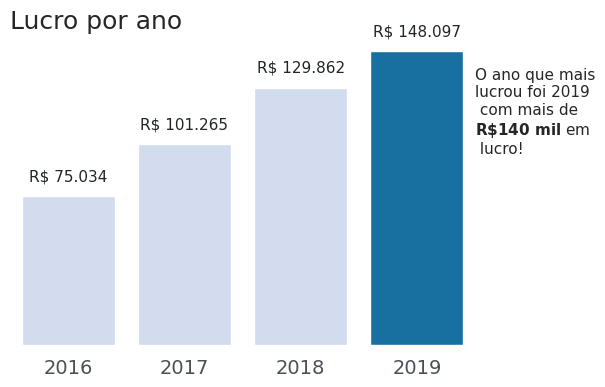

In [48]:
cores = [AZUL5, AZUL5, AZUL5, AZUL2]
fig, ax = plt.subplots(figsize = (6,4))
ax = sns.barplot(data = df_grafico, x= df_grafico.index , y = 'lucro', palette= cores)
ax.set_title('Lucro por ano', fontsize = 18, loc = 'left')
ax.set_xlabel('')
ax.set_ylabel('')
ax.xaxis.set_tick_params(labelsize = 14, labelcolor= CINZA2)
sns.despine( left = True, bottom = True)

ax.text(3.5,14e4,'O ano que mais\nlucrou foi 2019\n com mais de\n$\\bf{R\$ 140\ mil}$ em\n lucro!', va = 'top', fontsize = 11)

ax.set_yticklabels([])
for i, valor in enumerate(df_grafico['lucro']):
  qtd = f'R$ {valor:,.0f}'.replace(',','.')
  offset = 1e4
  ax.text(i, valor + offset, qtd , fontsize = 11, color= CINZA1, ha = 'center', va = 'center')

plt.show()


### Desafio 2

In [49]:
df_grafico_top10 = vendas.groupby('tipo_produto').sum('vendas').sort_values('vendas', ascending= False)[:10]
df_grafico_top10

,preco_base,preco_unit_sem_desc,desconto,preco_unit_venda,quantidade,vendas,lucro,ano
tipo_produto,,,,,,,,
pneus,259074.83,300810.91,61.800,277894.04,2968,1022428.97,67460.05,1612163
ferramentas,249495.99,282089.66,46.300,259104.82,2095,995158.41,41020.34,1099647
vasos,176087.87,190809.34,28.000,184595.65,2892,696044.18,33941.85,1553651
ferramentas de jardinagem,159812.14,201445.86,250.000,178275.52,5322,648879.72,53202.88,2742125
materiais de revestimento,166561.76,180684.05,37.850,158618.23,1126,629656.36,-28869.01,579072
equipamentos de limpeza,142497.25,165020.39,15.950,144072.23,407,542304.58,8724.39,215886
ferramentas automotivas,112509.45,133267.65,26.400,129108.19,2560,502109.29,63330.22,1357954
peças de reposição,108696.57,142750.86,5.100,133176.26,216,486907.94,91148.67,127118
encanamentos,96417.20,105404.86,22.235,95502.78,803,373223.88,-5622.34,417680


In [10]:
from matplotlib import transforms

def texto_colorido(x, y, texto, cores, esp=20, ax=None, **kw):
    cores = list(reversed(cores))
    t = ax.transData
    canvas = ax.figure.canvas

    for i, linha in enumerate(reversed(texto.split('\n'))):
        frases = linha.split('||')
        for s, cor in zip(frases, cores[i]):
            texto = ax.text(x, y, s, color=cor, transform=t, **kw)
            texto.draw(canvas.get_renderer())
            ex = texto.get_window_extent()
            t = transforms.offset_copy(texto._transform, x=ex.width,
                                       units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * esp, units='dots')

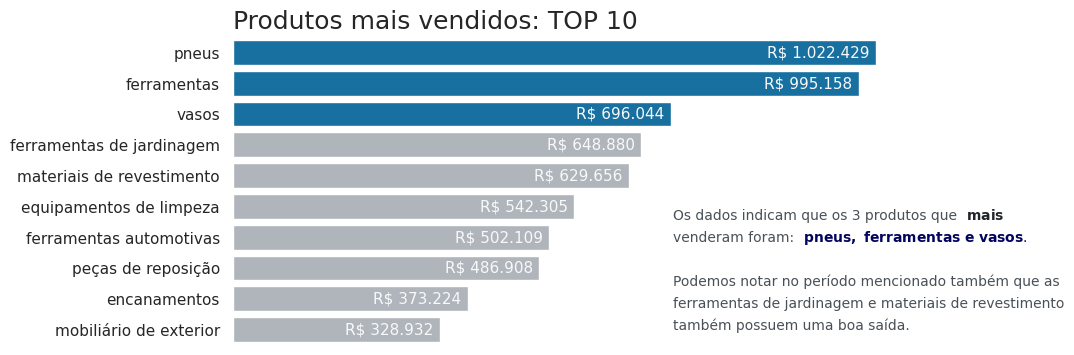

In [50]:
cores = [AZUL2, AZUL2, AZUL2, CINZA3, CINZA3, CINZA3, CINZA3, CINZA3, CINZA3, CINZA3]

fig, ax = plt.subplots(figsize = (10,4))
fig.subplots_adjust(right=0.8)
sns.set_theme(style= 'white')
ax = sns.barplot(data = df_grafico_top10, x= 'vendas', y = df_grafico_top10.index, palette = cores)
ax.set_title('Produtos mais vendidos: TOP 10', fontsize = 18, loc = 'left')
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticks([])
sns.despine( left = True, bottom = True)

for i, valor in enumerate(df_grafico_top10['vendas']):
  qtd = f'R$ {valor:,.0f}'.replace(',','.')
  offset = 1e4
  ax.text(valor - offset ,i , qtd, fontsize = 11, va = 'center', ha = 'right', color = CINZA5)

texto_colorido(
    7e5, 9,                                                      # coordenadas
    'Os dados indicam que os 3 produtos que || $\\bf{mais}$\n'     # texto
    'venderam foram: || $\\bf{pneus,\ ferramentas\ e\ vasos}$.\n'
    '\n'
    'Podemos notar no período mencionado também que as\n'
    'ferramentas de jardinagem e materiais de revestimento\n'
    'também possuem uma boa saída.',
    [[CINZA2, CINZA1],                # linha 1                     # cores
     [CINZA2, AZUL1],                 # linha 2
     [CINZA2],                        # linha 3
     [CINZA2],                        # linha 4
     [CINZA2],                        # linha 6
     [CINZA2]
    ],
    esp=22,         # espaçamento
    ax=ax,          # figura onde desenhar o texto
    fontsize=10)

plt.show()

## Aula 02 - Agrupando dados

Vamos praticar a criação de gráficos de comparação representando os valores agrupados por colunas e/ou barras. Para esse desafio, vamos seguir utilizando o conjunto de dados do relatório de vendas das lojas de departamentos de 2016 a 2019 que está disponível no [github do projeto](https://github.com/alura-cursos/dataviz-graficos/blob/master/dados/relatorio_vendas.csv).

Neste desafio, a missão é construir as visualizações que respondam aos questionamentos abaixo:

Desafio 1: Como estão divididas as vendas das lojas de departamentos na Região Centro-Oeste nos anos de 2017 e 2018? O mesmo estado permaneceu como o que mais vendeu nesta região?

Desafio 2: Analisando cada departamento, como estão divididos os modos de envio em cada um deles percentualmente?

Caso precise de ajuda, uma opção de solução da atividade estará disponível na seção “Opinião da pessoa instrutora”.

### Desafio 1

In [52]:
df_vendas = vendas.copy()
df_vendas = df_vendas.query('(ano == 2017 or ano == 2018)')
df_vendas

,data_pedido,data_envio,modo_envio,nome_cliente,segmento_cliente,cidade,estado,regiao,departamento,tipo_produto,preco_base,preco_unit_sem_desc,desconto,preco_unit_venda,quantidade,vendas,lucro,ano
0,2018-11-09,2018-11-12,Econômica,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sudeste,Materiais de construção,encanamentos,409.70,445.33,0.000,445.33,2,890.66,71.26,2018
1,2018-11-09,2018-11-12,Econômica,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sudeste,Materiais de construção,ferramentas,705.10,829.53,0.000,829.53,3,2488.59,373.29,2018
2,2018-06-13,2018-06-17,Econômica,Giovanna Lima,B2B,Rio de Janeiro,Rio de Janeiro,Sudeste,Jardinagem e paisagismo,sementes,19.02,24.86,0.000,24.86,2,49.72,11.68,2018
3,2017-10-12,2017-10-19,Entrega padrão,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sul,Materiais de construção,materiais de revestimento,781.38,840.19,0.225,651.15,5,3255.75,-651.15,2017
4,2017-10-12,2017-10-19,Entrega padrão,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sul,Jardinagem e paisagismo,vasos,35.88,42.24,0.100,38.02,2,76.04,4.28,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8931,2018-09-23,2018-09-29,Entrega padrão,Fernando da Cunha,B2C,Crato,Ceará,Nordeste,Jardinagem e paisagismo,pesticidas,13.21,17.27,0.000,17.27,7,120.89,28.42,2018
8932,2018-09-23,2018-09-29,Entrega padrão,Fernando da Cunha,B2C,Crato,Ceará,Nordeste,Automotivo,pneus,143.24,166.56,0.000,166.56,2,333.12,46.64,2018
8933,2017-05-18,2017-05-24,Entrega padrão,Alexandre Barbosa,B2C,Natal,Rio Grande do Norte,Nordeste,Jardinagem e paisagismo,sementes,8.14,10.71,0.000,10.71,10,107.10,25.70,2017
8934,2017-05-18,2017-05-24,Entrega padrão,Alexandre Barbosa,B2C,Natal,Rio Grande do Norte,Nordeste,Jardinagem e paisagismo,materiais de paisagismo,40.41,47.26,0.000,47.26,4,189.04,27.40,2017


In [53]:
df_vendas_cross = pd.crosstab(index = df_vendas['ano'], columns= df_vendas['estado'][df_vendas['regiao']=='Centro-Oeste'], values = df_vendas['vendas'], aggfunc = 'sum')
df_vendas_cross

estado,Distrito Federal,Goiás,Mato Grosso,Mato Grosso do Sul
ano,,,,
2017,64308.70,66078.33,5259.46,13568.51
2018,103036.69,79801.93,10980.07,14250.02


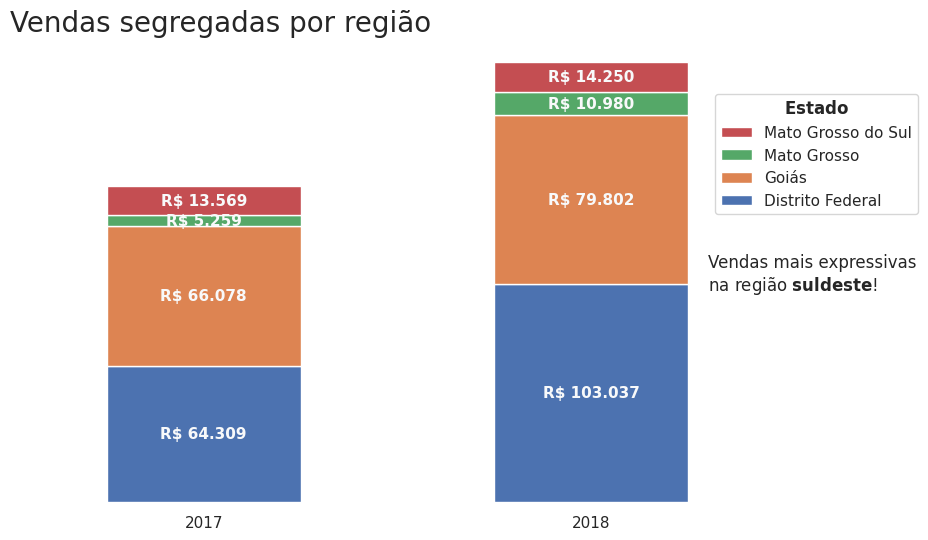

In [54]:
ax = df_vendas_cross.plot(kind = 'bar', figsize = (10,6), stacked= True)

ax.set_xlabel('')
ax.set_ylabel('')
ax.xaxis.set_tick_params(rotation=0)
ax.set_yticks([])
ax.set_frame_on(False)
ax.set_title('Vendas segregadas por região', size= 20, loc = 'left')

ax.text(1.3, 1e5, 'Vendas mais expressivas\nna região $\\bf{suldeste}$!')

ax.legend(loc='best', bbox_to_anchor=(0.9,0.9), title= "$\\bf{Estado}$", reverse=True)

for container in ax.containers:
  label= [f'R$ {valor.get_height():,.0f}'.replace(',','.') for valor in container]
  ax.bar_label(container, labels = label, fontsize = 11 , color = CINZA5, label_type= 'center', fontweight = 'bold')


#### Feito pelo professor

In [31]:
# Importando as bibliotecas
import pandas as pd

# Importando o relatório de vendas e atualizando a colunas de pedido para o tipo data
vendas = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/dataviz-graficos/master/dados/relatorio_vendas.csv")
vendas["data_pedido"] = pd.to_datetime(vendas["data_pedido"], format="%Y-%m-%d")

# Criando um df com os dados desejados
vendas_co = vendas.copy()
vendas_co = vendas_co[['data_pedido','regiao', 'estado', 'vendas']]

# Gerando uma coluna que represente apenas os anos puxando-os da coluna data pedido
vendas_co['ano'] = vendas_co.data_pedido.dt.year

# Selecionando apenas os dados do Centro-Oeste dos anos de 2017 e 2018 e removendo as colunas de data_pedido e região
vendas_co = vendas_co.query("regiao == 'Centro-Oeste' and (ano == 2017 or ano == 2018)")
vendas_co.drop(labels = ["data_pedido","regiao"], axis = 1, inplace = True)

vendas_co


,estado,vendas,ano
26,Distrito Federal,10483.69,2017
27,Distrito Federal,32.70,2017
28,Distrito Federal,422.28,2017
29,Distrito Federal,11.10,2017
30,Distrito Federal,293.40,2017
...,...,...,...
8737,Distrito Federal,421.35,2018
8833,Mato Grosso,289.20,2017
8884,Distrito Federal,114.00,2018
8885,Distrito Federal,124.92,2018


In [32]:
# Criando uma tabela cruzada (crosstab) com os valores de venda de cada ano por estado
vendas_co_ano = pd.crosstab(index = vendas_co.ano, columns = vendas_co.estado,
                         values = vendas_co.vendas, aggfunc = "sum")

vendas_co_ano


estado,Distrito Federal,Goiás,Mato Grosso,Mato Grosso do Sul
ano,,,,
2017,64308.70,66078.33,5259.46,13568.51
2018,103036.69,79801.93,10980.07,14250.02


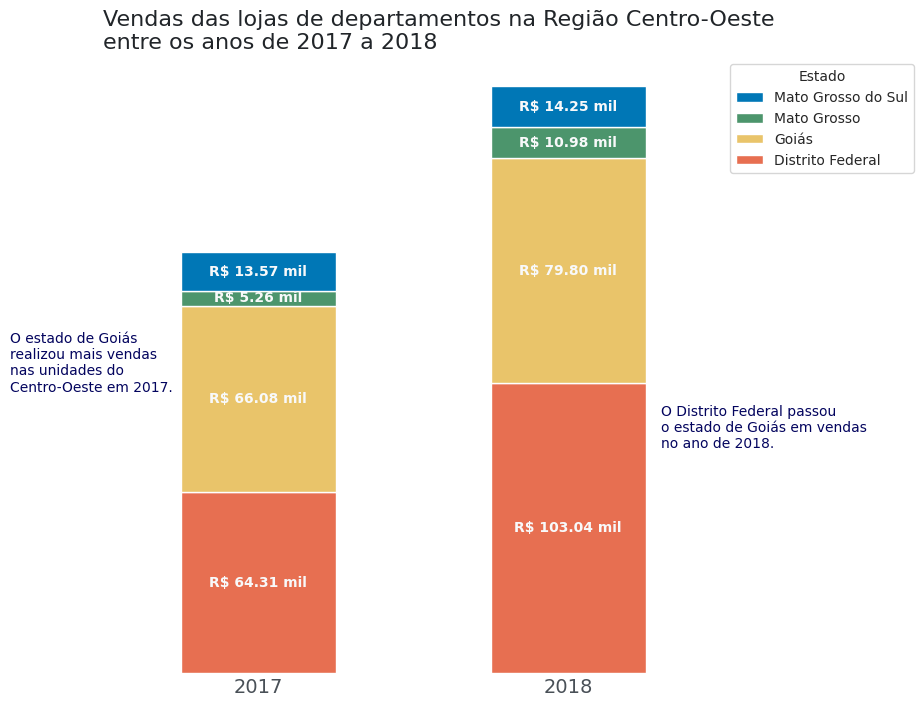

In [33]:
# Definindo as cores do gráfico
cores = [VERMELHO1, AMARELO1, VERDE1, AZUL2]

# Gerando o gráfico de colunas empilhadas
ax = vendas_co_ano.plot(kind="bar", stacked=True, figsize=(8,8), color = cores)

# Personalizando o gráfico
ax.set_title('Vendas das lojas de departamentos na Região Centro-Oeste\nentre os anos de 2017 a 2018',
             loc='left', fontsize=16, color = CINZA1)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_yticklabels([])
ax.xaxis.set_tick_params(labelsize=14, labelcolor = CINZA2, rotation = 0)
ax.set_frame_on(False)

# remover todos os ticks do eixo x e y
ax.tick_params(axis="both", which ="both", length=0)

# Anotando uma conclusão no gráfico
ax.text(-0.8, 1e5, 'O estado de Goiás\nrealizou mais vendas\nnas unidades do\nCentro-Oeste em 2017.',
        fontsize=10, linespacing=1.2, color=AZUL1)
ax.text(1.3, 8e4, 'O Distrito Federal passou\no estado de Goiás em vendas\nno ano de 2018.',
        fontsize=10, linespacing=1.2, color=AZUL1)

# Personalizando a legenda
ax.legend(bbox_to_anchor=(1,1), reverse = True, title= "Estado", title_fontsize = 10, fontsize = 10)

# Adicionando os valores
for container in ax.containers:
  labels = [f'R$ {valor.get_height()/1000:,.2f} mil'.replace(",",".") for valor in container]
  ax.bar_label(container, label_type="center", labels = labels, size = 10, color = CINZA5, fontweight = "bold")

fig = ax.get_figure()


### Desafio 2

In [60]:
vendas.head()
df_venda2 = vendas.copy()
df_venda2

,data_pedido,data_envio,modo_envio,nome_cliente,segmento_cliente,cidade,estado,regiao,departamento,tipo_produto,preco_base,preco_unit_sem_desc,desconto,preco_unit_venda,quantidade,vendas,lucro,ano
0,2018-11-09,2018-11-12,Econômica,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sudeste,Materiais de construção,encanamentos,409.70,445.33,0.000,445.33,2,890.66,71.26,2018
1,2018-11-09,2018-11-12,Econômica,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sudeste,Materiais de construção,ferramentas,705.10,829.53,0.000,829.53,3,2488.59,373.29,2018
2,2018-06-13,2018-06-17,Econômica,Giovanna Lima,B2B,Rio de Janeiro,Rio de Janeiro,Sudeste,Jardinagem e paisagismo,sementes,19.02,24.86,0.000,24.86,2,49.72,11.68,2018
3,2017-10-12,2017-10-19,Entrega padrão,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sul,Materiais de construção,materiais de revestimento,781.38,840.19,0.225,651.15,5,3255.75,-651.15,2017
4,2017-10-12,2017-10-19,Entrega padrão,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sul,Jardinagem e paisagismo,vasos,35.88,42.24,0.100,38.02,2,76.04,4.28,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8935,2018-09-30,2018-10-04,Entrega padrão,Enrique Santos,B2C,Rio de Janeiro,Rio de Janeiro,Sudeste,Automotivo,ferramentas automotivas,97.34,123.22,0.000,123.22,1,123.22,25.88,2018
8936,2019-11-18,2019-11-22,Entrega padrão,Heitor Silveira,B2B,Jequié,Bahia,Nordeste,Automotivo,ferramentas automotivas,223.01,271.97,0.000,271.97,1,271.97,48.96,2019
8937,2019-11-18,2019-11-22,Entrega padrão,Heitor Silveira,B2B,Jequié,Bahia,Nordeste,Automotivo,pneus,121.23,140.15,0.000,140.15,5,700.75,94.60,2019
8938,2016-01-22,2016-01-24,Econômica,Isabel Araújo,B2C,João Pessoa,Paraíba,Nordeste,Materiais de construção,iluminação,26.29,31.79,0.100,28.61,3,85.83,6.96,2016


In [61]:
df_dep_cross = pd.crosstab(index = df_venda2['modo_envio'], columns = df_venda2['departamento'], values = df_venda2['vendas'], aggfunc= 'sum')[['Automotivo','Jardinagem e paisagismo', 'Materiais de construção']]
df_dep_cross.sort_index()
df_dep_cross

departamento,Automotivo,Jardinagem e paisagismo,Materiais de construção
modo_envio,,,
24 horas,184631.11,94752.22,120613.74
Econômica,449248.12,508777.43,489610.40
Entrega padrão,1478003.81,1336159.29,1318859.15
Envio rápido,441867.74,314291.65,344184.89


In [62]:
df_dep_cross_perc = pd.crosstab(index = df_venda2['modo_envio'], columns = df_venda2['departamento'], values = df_venda2['vendas'], aggfunc= 'sum', normalize= 'index')
df_dep_cross_perc.sort_index()
df_dep_cross_perc

departamento,Automotivo,Jardinagem e paisagismo,Materiais de construção
modo_envio,,,
24 horas,0.461581,0.236882,0.301537
Econômica,0.310332,0.351454,0.338214
Entrega padrão,0.357608,0.323289,0.319103
Envio rápido,0.401572,0.285630,0.312797


In [110]:
# Definindo a paleta de cores
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5 = '#03045e', '#0077b6', "#00b4d8", '#90e0ef', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5 = '#212529', '#495057', '#adb5bd', '#dee2e6', '#f8f9fa'
VERMELHO1, LARANJA1, AMARELO1, VERDE1, VERDE2 = '#e76f51', '#f4a261',	'#e9c46a', '#4c956c', '#2a9d8f'

In [100]:
# Código para gerar o texto colorido

from matplotlib import transforms

def texto_colorido(x, y, texto, cores, esp=20, ax=None, **kw):
    cores = list(reversed(cores))
    t = ax.transData
    canvas = ax.figure.canvas

    for i, linha in enumerate(reversed(texto.split('\n'))):
        frases = linha.split('||')
        for s, cor in zip(frases, cores[i]):
            texto = ax.text(x, y, s, color=cor, transform=t, **kw)
            texto.draw(canvas.get_renderer())
            ex = texto.get_window_extent()
            t = transforms.offset_copy(texto._transform, x=ex.width,
                                       units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * esp, units='dots')


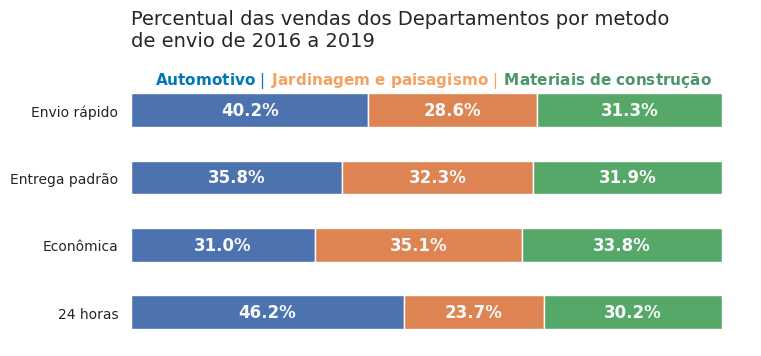

In [151]:
ax = df_dep_cross_perc.plot(kind= 'barh', stacked=True,legend= None, figsize=(8,3.5))

ax.set_title('Percentual das vendas dos Departamentos por metodo\nde envio de 2016 a 2019\n', loc='left', size = 14)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticklabels([])
ax.yaxis.set_tick_params(labelsize=10, color = CINZA3)
ax.set_frame_on(False)

texto_colorido(0.04,3.39, '$\\bf{Automotivo}$ | ||$\\bf{\ Jardinagem\ e\ paisagismo}$ | ||$\\bf{\ Materiais\ de\ construção}$',
               esp= 22, ax=ax, cores= [[AZUL2, LARANJA1, VERDE1]], fontsize=11)

for container in ax.containers:
  label = [f'{valor.get_width()*100:.1f}%'for valor in container]
  ax.bar_label(container, labels= label, label_type = 'center', color = CINZA5, fontweight = 'bold')

#### Feito pelo professor

In [39]:
# Importando as bibliotecas
import pandas as pd

# Importando o relatório de vendas
vendas = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/dataviz-graficos/master/dados/relatorio_vendas.csv")

# Criando um df com os dados desejados
df_depart = vendas.copy()
df_depart = df_depart[['departamento','modo_envio']]

## Criando uma tabela cruzada (crosstab) com a frequência de modos de envio por departamento
df_depart = pd.crosstab(index = df_depart.departamento, columns = df_depart.modo_envio, normalize = "index")

df_depart


modo_envio,24 horas,Econômica,Entrega padrão,Envio rápido
departamento,,,,
Automotivo,0.051766,0.195493,0.593179,0.159562
Jardinagem e paisagismo,0.055504,0.190854,0.605569,0.148073
Materiais de construção,0.058133,0.202133,0.588267,0.151467


In [99]:
# Código para gerar o texto colorido

from matplotlib import transforms

def texto_colorido(x, y, texto, cores, esp=20, ax=None, **kw):
    cores = list(reversed(cores))
    t = ax.transData
    canvas = ax.figure.canvas

    for i, linha in enumerate(reversed(texto.split('\n'))):
        frases = linha.split('||')
        for s, cor in zip(frases, cores[i]):
            texto = ax.text(x, y, s, color=cor, transform=t, **kw)
            texto.draw(canvas.get_renderer())
            ex = texto.get_window_extent()
            t = transforms.offset_copy(texto._transform, x=ex.width,
                                       units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * esp, units='dots')


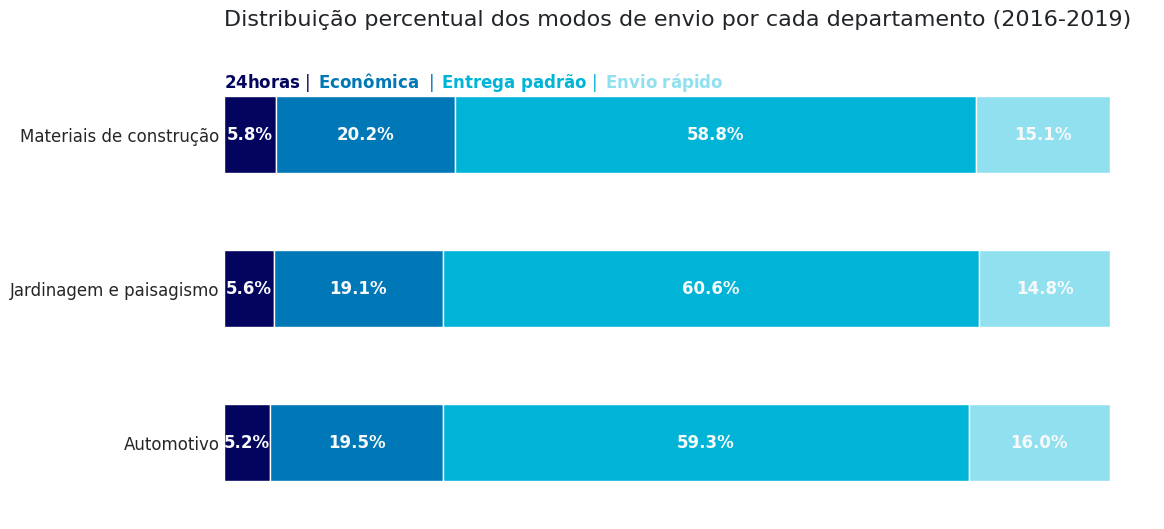

In [41]:
# Definindo as cores do gráfico
cores = [AZUL1, AZUL2, AZUL3, AZUL4]

# Gerando o gráfico de barras empilhadas
ax = df_depart.plot(kind="barh", stacked=True, figsize=(12,6), color = cores, legend = None)
ax.set_title("Distribuição percentual dos modos de envio por cada departamento (2016-2019)\n",
             fontsize=16, loc="left", color=CINZA1)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticklabels([])
ax.yaxis.set_tick_params(labelsize=12, color = CINZA2)
ax.set_frame_on(False)

# remover todos os ticks do eixo x e y
ax.tick_params(axis='both', which='both', length=0)

# legenda dos dados
texto_colorido(0, 2.3, '$\\bf{24 horas}$ | || $\\bf{Econômica}$  | || $\\bf{Entrega\ padrão}$ | || $\\bf{Envio\ rápido}$', cores = [cores], ax=ax, fontsize=12)

# Valores das barras
for container in ax.containers:
    labels = [f'{valor.get_width()*100:.1f}%' for valor in container]
    ax.bar_label(container, label_type='center', labels = labels, size = 12, color = CINZA5, fontweight='bold')

fig = ax.get_figure()


## Aula 03 - Séries de tempo

### Desafio 1

### Desafio 2

## Aula 04 - Distribuindo dados

### Desafio 1

### Desafio 2

## Aula 05 - Explorando padrões nos dados

### Desafio 1

### Desafio 2